(1)The problem can be expressed as 

$$
\text{minimize } ||Ax -b||^2_2 \\
\text{subject to } Gx \leq h 
$$

Where 

$$
A  = 
\begin{bmatrix}
g(t_1) \\
g(t_2) \\
. \\
. \\
g(t_N)
\end{bmatrix},
x = 
\begin{bmatrix}
x_1\\
x_2 \\
. \\
. \\
x_{M+3}
\end{bmatrix},
b = 
\begin{bmatrix}
t_1\\
t_2 \\
. \\
. \\
t_N
\end{bmatrix} \\

G = 
\begin{bmatrix}
-g^{''}(t_1)\\
-g^{''}(t_2) \\
. \\
. \\
-g^{''}(t_N)
\end{bmatrix},
h = \vec{0}
$$


(2)

In [128]:
import numpy
import matplotlib.pyplot as plt 
from spline_data import t, y 
from bsplines import * 
import cvxpy as cp 
%matplotlib inline 


/Users/deyuyang/Desktop/convex_optimization/hw2_code/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


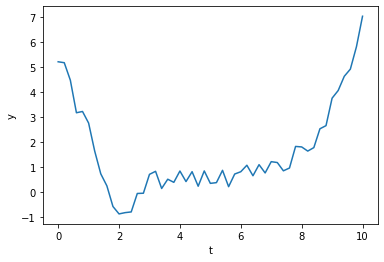

In [129]:
plt.plot(t, y)
plt.xlabel("t")
plt.ylabel("y")
plt.show()



In [130]:
m = 13 
n = t.shape[0]
A = np.zeros((n,m)) 
G = np.zeros((n,m))
for i in np.arange(A.shape[0]):
    g,_,gpp = bsplines(t[i])
    A[i]= g
    G[i] = -gpp 
 


/Users/deyuyang/Desktop/convex_optimization/hw2_code/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:

x = cp.Variable(m)
objective = cp.Minimize(cp.sum_squares(A@x - y))
constraints = [G@x<=0]
prob = cp.Problem(objective, constraints)
result = prob.solve() 
print(x.value)


[ 5.69438888  4.41060672  1.8430424  -0.38409468 -0.08762342  0.20884784
  0.5053191   0.80179036  1.09826161  1.39473287  3.12555339  5.22124366
  6.90143774]


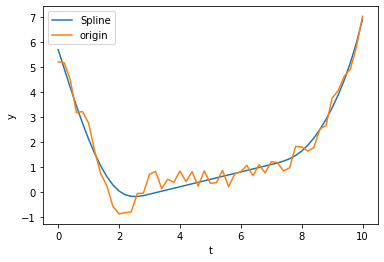

In [132]:

opt_x = x.value
opt_y = A@opt_x
spline_combine,  = plt.plot(t, opt_y,label = 'Spline')
origin = plt.plot(t,y, label = 'origin')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

/Users/deyuyang/Desktop/convex_optimization/hw2_code/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


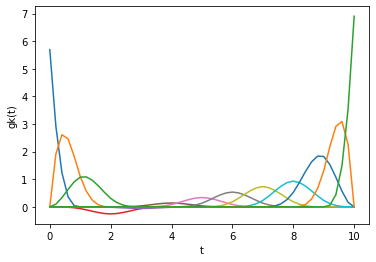

In [133]:
opt_x = x.value
opt_y = A*opt_x
plt.plot(t, opt_y)
plt.xlabel("t") 
plt.ylabel("gk(t)")
plt.show()